Degree: 1, Test MSE: 84.8347
Degree: 2, Test MSE: 81.8538
Degree: 3, Test MSE: 62.8069
Degree: 4, Test MSE: 68.0297
Degree: 5, Test MSE: 88.1074
Degree: 6, Test MSE: 99.6578
Degree: 7, Test MSE: 99461396654587600.0000
Degree: 8, Test MSE: 978152926857866624.0000
Degree: 9, Test MSE: 6704333823821066240.0000
Best Degree: 3, Lowest Test MSE: 62.8069
Mean Squared Error on Training Data (Best Model): 71.7674
Mean Squared Error on Test Data (Best Model): 62.8069


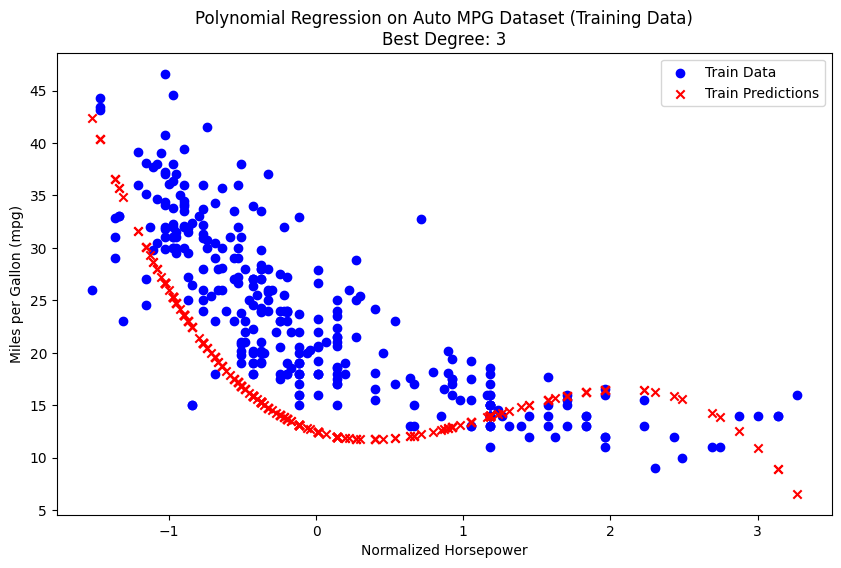

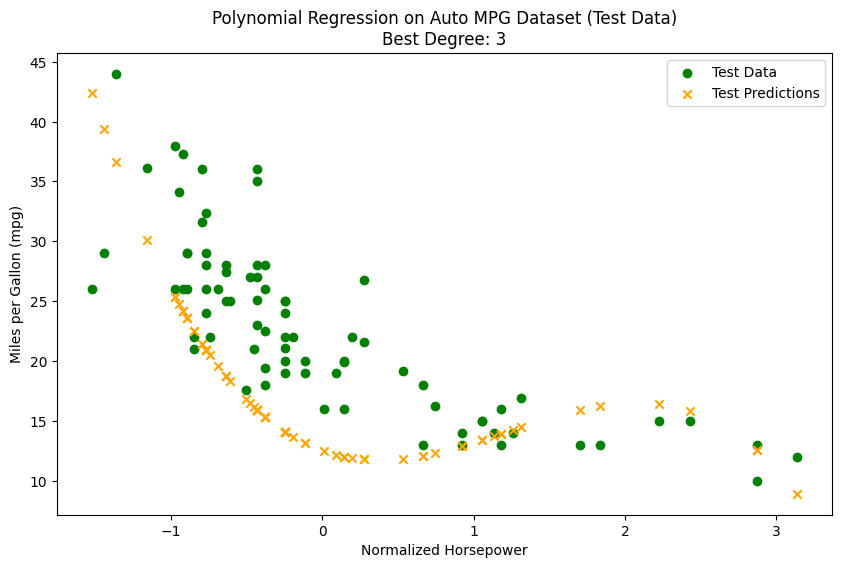

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import seaborn as sns

class PolynomialRegression:
    """
    Polynomial Regression model using gradient descent optimization.

    Attributes:
    degree (int): Degree of the polynomial features.
    learning_rate (float): The learning rate for gradient descent.
    n_iterations (int): The number of iterations for gradient descent.
    theta (np.ndarray): The coefficients of the polynomial regression model.
    """

    def __init__(self, degree, learning_rate=0.001, n_iterations=1000, clip_value=1e10):
        """
        Initializes the Polynomial Regression model.

        Parameters:
        degree (int): Degree of the polynomial features.
        learning_rate (float): The learning rate for gradient descent.
        n_iterations (int): The number of iterations for gradient descent.
        clip_value (float): Value to clip gradients to prevent overflow.
        """
        self.degree = degree
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.clip_value = clip_value
        self.theta = None

    def _polynomial_features(self, X):
        """
        Generates polynomial features for the input data X up to the specified degree.

        Parameters:
        X (np.ndarray): Input features, shape (n_samples,).

        Returns:
        np.ndarray: Polynomial features, shape (n_samples, degree + 1).
        """
        X = X[:, np.newaxis] if X.ndim == 1 else X
        X_poly = np.hstack([X**i for i in range(self.degree + 1)])
        return X_poly

    def _gradient_descent(self, X_poly, y):
        """
        Performs gradient descent to learn the coefficients of the model.

        Parameters:
        X_poly (np.ndarray): Polynomial features, shape (n_samples, degree + 1).
        y (np.ndarray): Target values, shape (n_samples,).
        """
        m = len(y)
        self.theta = np.zeros(X_poly.shape[1])
        for _ in range(self.n_iterations):
            gradients = (1 / m) * (X_poly.T @ (X_poly @ self.theta - y))

            # Clip gradients to prevent overflow
            gradients = np.clip(gradients, -self.clip_value, self.clip_value)

            self.theta -= self.learning_rate * gradients

    def fit(self, X, y):
        """
        Fits the polynomial regression model to the data using gradient descent.

        Parameters:
        X (np.ndarray): Input features, shape (n_samples,).
        y (np.ndarray): Target values, shape (n_samples,).
        """
        X_poly = self._polynomial_features(X)
        self._gradient_descent(X_poly, y)

    def predict(self, X):
        """
        Predicts target values using the fitted polynomial regression model.

        Parameters:
        X (np.ndarray): Input features, shape (n_samples,).

        Returns:
        np.ndarray: Predicted target values, shape (n_samples,).
        """
        X_poly = self._polynomial_features(X)
        return X_poly @ self.theta

def main():
    # Load the Auto MPG Dataset
    data = sns.load_dataset('mpg').dropna()
    X = data['horsepower'].values  # Use 'horsepower' feature
    y = data['mpg'].values  # Target: miles per gallon (mpg)

    # Standardize the features
    scaler = StandardScaler()
    X = scaler.fit_transform(X.reshape(-1, 1)).flatten()

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Define a range of polynomial degrees to test
    degrees = range(1, 10)
    best_degree = None
    lowest_mse = float('inf')
    best_model = None

    for degree in degrees:
        # Create and fit the polynomial regression model
        model = PolynomialRegression(degree, learning_rate=0.0001, n_iterations=10000)
        model.fit(X_train, y_train)

        # Predict on test data
        y_test_pred = model.predict(X_test)

        # Calculate Mean Squared Error for test data
        mse_test = mean_squared_error(y_test, y_test_pred)
        print(f"Degree: {degree}, Test MSE: {mse_test:.4f}")

        # Keep track of the best model
        if mse_test < lowest_mse:
            lowest_mse = mse_test
            best_degree = degree
            best_model = model

    print(f"Best Degree: {best_degree}, Lowest Test MSE: {lowest_mse:.4f}")

    # Predict on training data using the best model
    y_train_pred = best_model.predict(X_train)

    # Predict on testing data using the best model
    y_test_pred = best_model.predict(X_test)

    # Calculate Mean Squared Error for training and test data with the best model
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    print(f"Mean Squared Error on Training Data (Best Model): {mse_train:.4f}")
    print(f"Mean Squared Error on Test Data (Best Model): {mse_test:.4f}")

    # Plot the results for training data with the best model
    plt.figure(figsize=(10, 6))
    plt.scatter(X_train, y_train, color='blue', label='Train Data')
    plt.scatter(X_train, y_train_pred, color='red', marker='x', label='Train Predictions')
    plt.xlabel('Normalized Horsepower')
    plt.ylabel('Miles per Gallon (mpg)')
    plt.title(f'Polynomial Regression on Auto MPG Dataset (Training Data)\nBest Degree: {best_degree}')
    plt.legend()
    plt.show()

    # Plot the results for test data with the best model
    plt.figure(figsize=(10, 6))
    plt.scatter(X_test, y_test, color='green', label='Test Data')
    plt.scatter(X_test, y_test_pred, color='orange', marker='x', label='Test Predictions')
    plt.xlabel('Normalized Horsepower')
    plt.ylabel('Miles per Gallon (mpg)')
    plt.title(f'Polynomial Regression on Auto MPG Dataset (Test Data)\nBest Degree: {best_degree}')
    plt.legend()
    plt.show()

if __name__ == "__main__":
    main()
